# FEATURE ENGINEERING

## ON NUMERICAL DATA

Variables númericas son de tipo float o integer.

En ocasiones requieren de transformaciones como eslacar las variables o cambiar su distribución.

In [1]:
# Importar las librerías requeridas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1,1,1,0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

Para procesar numerial features vamos a trabajar con el data set de Pokemon.

In [2]:
# importar el data set.
url = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/Pokemon.csv'

poke_df = pd.read_csv(url, encoding = 'utf-8')

poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [3]:
# Algunos de las columnas numéricas del data set:
# Método describe para obtener mayor info sobre estas variables

poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [4]:
def ecdf(data):
    
    # Numero de datos de la data
    n = len(data)

    # Se ordenan los datos y esto genera el eje x
    x = np.sort(data)

    # se establece el porcentaje acumulado y esto genera el eje y
    y = np.arange(1, n+1) / n

    return x, y

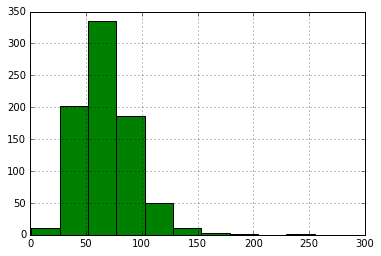

In [5]:
# Gráfica de la distribución de cada variables y su correspondiente ecdf

poke_df['HP'].hist(color='green')

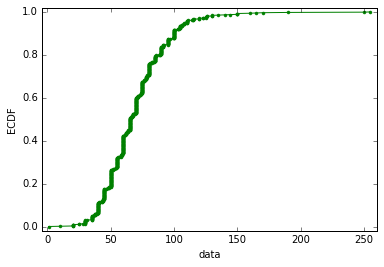

In [6]:
x, y = ecdf(poke_df['HP'])
_ = plt.plot(x, y, marker='.', color = 'green')
# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('data')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

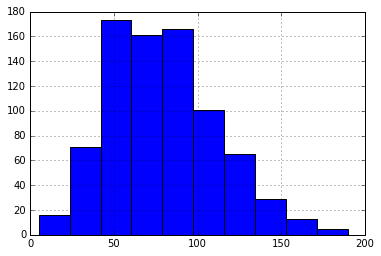

In [7]:
poke_df['Attack'].hist(color='blue')

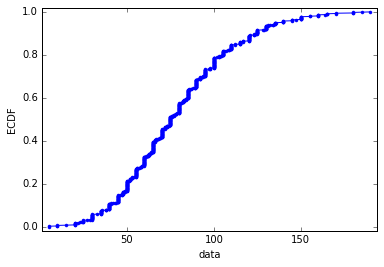

In [8]:
x, y = ecdf(poke_df['Attack'])
_ = plt.plot(x, y, marker='.', color = 'blue')
# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('data')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

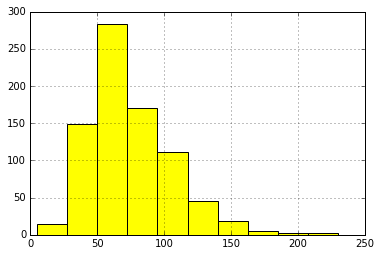

In [9]:
poke_df['Defense'].hist(color='yellow')

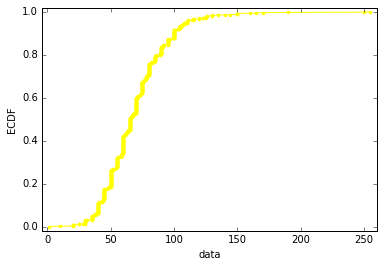

In [10]:
x, y = ecdf(poke_df['HP'])
_ = plt.plot(x, y, marker='.', color = 'yellow')
# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('data')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Visualmente vemos las distribuciones de 'HP' y 'Defense' parecidas a una normal pero con sesgo a la derecha, en ambas gráficas ecdf se detectan algunos outliers.

La distribución se oberva una distribución mas achatada (kurtosis), con menos sesgo y pocos outliers.

## Binarización

Con el siguiente data set exploraremos cuentas dentro de las variables para encontrar frecuencias y lo usaremos para entender el concepto de BINARIZACIÓN que consiste en categorizar una variable con 0 y 1.

In [11]:
url1 = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/song_views.csv'

popsong_df = pd.read_csv(url1)

popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


In [12]:
# Binarización en este ejemplo es crear una columna en donde me indique si la canción fue escuchada o no
# mas allá de cuantas veces fue escuchada

# Se crea un array con la variable que queremos binarizar
watched = np.array(popsong_df['listen_count'])

# Las canciones que fueron escuchadas 1 o mas veces se igualan a 1
watched[watched >= 1] = 1

# Adiciono la columna watched al data set
popsong_df['watched'] = watched

In [13]:
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [14]:
# Otro método para binarizar es Binarizer de scikit-learn

# import la libreria de sklearn Binarizer
from sklearn.preprocessing import Binarizer

# creo el binarizador
bn = Binarizer(threshold=0.9)

# threshold es el límite seleccionado para asignar 0 o 1, si el valor es mayor al threshold entonces es 1, 
# de lo contrario 0. En este caso se coloca 0.9 por que si la canción fue escuhada 1 ves, 1 vs 0.9, le asignará
# el valor =1, si se ha escuhado 0 veces se coloca 0.

pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


## Rounding

En muchas ocasiones es necesario trabajar con porcentajes o proporciones y en muchas de esas ocasiones es preferible redondear dichas cifras e incluso categorizarlas.

In [15]:
# cargar el data set a trabajar

url2 = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/item_popularity.csv'

items_popularity = pd.read_csv(url2)

items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [16]:
# Redondear porcentajes

items_popularity['Ronded off'] = np.array(np.round(items_popularity['pop_percent']*100), dtype= 'int')

items_popularity

,item_id,pop_percent,Ronded off
0,it_01345,0.98324,98
1,it_03431,0.56123,56
2,it_04572,0.12098,12
3,it_98021,0.35476,35
4,it_01298,0.92101,92
5,it_90120,0.81212,81
6,it_10123,0.56502,57


## Interactions.

Una parte importante dentro de la ingeniería de variables es incluir dentro de los modelos de regresión (no en todos los casos) variables que describan las interacciones entre las variables, esa interacción se reaiza mediante el aumento del grado de la ecuación.

Un modelo de regresión normal es del orden y = a + b1x1  + b2x2 + b3x3...+bnxn, una descripción de un modelo con interacción entre variables sería y = a + b1x1 + b2x2 + b11X1^2 + b22X2^2 + b11x1*x2...

Para un grado 2 sklearn crea las variables de interacción así:  [1, a, b, a^2, ab, b^2].


In [17]:
# Vamos a procesar algunas interacciones entre variables en el Pokemon data set

# Creo un nuecvo data frame con las variables Atack y Defense
atk_def = poke_df[['Attack', 'Defense']]

atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [18]:
# Crear la interacción entre Attack y Defense
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#

from sklearn.preprocessing import PolynomialFeatures

# Creamos el elemento para generar interacción
# degree = El grado de polinomio
pf = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)

# creamos las interacciones
res = pf.fit_transform(atk_def)

res[0:9]

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       [  100.,   123., 10000., 12300., 15129.],
       [   52.,    43.,  2704.,  2236.,  1849.],
       [   64.,    58.,  4096.,  3712.,  3364.],
       [   84.,    78.,  7056.,  6552.,  6084.],
       [  130.,   111., 16900., 14430., 12321.],
       [  104.,    78., 10816.,  8112.,  6084.]])

In [19]:
pd.DataFrame(pf.powers_, columns = ['Attack_degree', 'Defense_degree'])

# Los grados son la máxima potencia de la función, la matriz muestra el grado de cada variable
# siendo 0 = Attack, 1 = Defense, 3 = Attack^2...

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [20]:
intr_features = pd.DataFrame(res, columns = ['Attack', 'Defense','Attack^2','Attack x Defense', 'Defense^2'])

intr_features.head(10)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0
5,64.0,58.0,4096.0,3712.0,3364.0
6,84.0,78.0,7056.0,6552.0,6084.0
7,130.0,111.0,16900.0,14430.0,12321.0
8,104.0,78.0,10816.0,8112.0,6084.0
9,48.0,65.0,2304.0,3120.0,4225.0


## Binning

Binning es catagorizar numerical data según la frecuencia de ocurrencia en un histograma. Es al algunos casos mul útil para modelos de predicción.

In [21]:
# Cargaremos un data set sobre un estudio relacionado con desarrolladores de software

url3 = 'https://raw.githubusercontent.com/dipanjanS/practical-machine-learning-with-python/master/notebooks/Ch04_Feature_Engineering_and_Selection/datasets/fcc_2016_coder_survey_subset.csv'

fcc_survey_df = pd.read_csv(url3)

fcc_survey_df.head()

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN
3,04a11e4bcb573a1261eb0d9948d32637,26.0,NaN,United States of America,"arts, entertainment, sports, or media",Employed for wages,65000.0,female,43000.0,work for a startup,Front-End Web Developer,English,NaN,bachelor's degree,7000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN


In [22]:
# Para binning utilizaremos las columnas 'Age'  y 'Income'

fcc_survey_df[['ID.x','EmploymentField','Age','Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## Fixed-width Binning (Bin de ancho fijo)

En esta técnica se asigna un ancho fijo para categorizar la data a un ancho de bin determinado previamente.

Text(0,0.5,'Frequency')

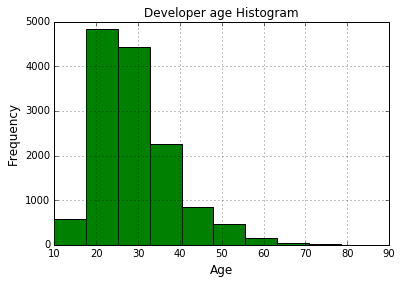

In [26]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color = 'green')
ax.set_title('Developer age Histogram', fontsize = 12)
ax.set_xlabel('Age', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

Como siempre los bins son raros y no capturan bien la información.

Establecer nuevos bins:

0-9 : 0

10-19 : 1

20:29 : 2

30-39 : 3

40-49 : 4

50-59 : 5

60-69 : 6

70-79 : 7

80-89 : 8

90-99 : 9

In [34]:
# Para establecer el bin correcto a cada observación vamos a unsar round

# np.floor redondea al número mas bajo, elimina los decimales
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.floor.html
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']/10.)))

fcc_survey_df.sample(5)

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe,Age_bin_round
2888,25e10e94b3a6840a5ad14176452bc5e4,31.0,1.0,United States of America,health care,Employed for wages,NaN,male,38000.0,NaN,NaN,English,married or domestic partnership,bachelor's degree,24000.0,3.0
14525,0e867eb18c10b83fe92ae20e0e927a48,23.0,NaN,United States of America,NaN,Employed for wages,NaN,female,64000.0,NaN,NaN,English,NaN,bachelor's degree,30000.0,2.0
7199,76e2d0f7195b8cc0b4d24334e16c6807,22.0,NaN,Bulgaria,food and beverage,Employed for wages,30000.0,male,8000.0,work for a medium-sized company,Full-Stack Web Developer,Macedonian,NaN,high school diploma or equivalent (GED),NaN,2.0
10763,392d4f525a6abc01be5fd8aa059a9bfa,NaN,NaN,NaN,NaN,NaN,60000.0,NaN,NaN,work for a startup,Full-Stack Web Developer,NaN,NaN,NaN,NaN,NaN
3144,b22fb518473b1c46548492d58df56272,37.0,NaN,United States of America,food and beverage,Employed for wages,NaN,female,19900.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN,3.0


Vamos a redefinir la amplitud de los bins y vamos a fijarlos:

0-15: 1

16-30: 2

31-45: 3

46:60: 4

61:75: 5

75:100: 6

In [35]:
bin_ranges = [0,15,30,45,60,75,100]
bin_names = [1,2,3,4,5,6]

In [39]:
# Pandas.cut esta diseñado para binarizar.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
fcc_survey_df['Age_bins_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), bins = bin_ranges)
fcc_survey_df['Age_bins_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), bins = bin_ranges , labels = bin_names)
fcc_survey_df.head(3)

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe,Age_bin_round,Age_bins_custom_range,Age_bins_custom_label
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0,2.0,"(15, 30]",2
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN,2.0,"(15, 30]",2
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN,1.0,"(15, 30]",2


## Adaptive binning

Adaptive binning es la técnica en la cual se crean los bines a partir de n-Quantiles distribuyendo así mejor el número de bines y la cantidad de obervaciones de cada bin.

In [40]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0,0.5,'Frequency')

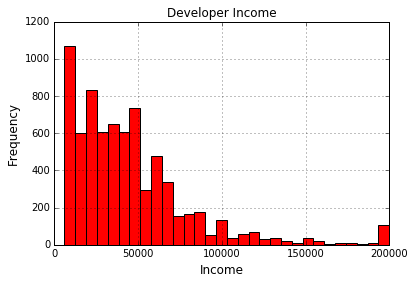

In [43]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins = 30,color = 'red')
ax.set_title('Developer Income', fontsize = 12)
ax.set_xlabel('Income', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

Como observamos no se ven bien distribuidos los bines dado que no hay orden en este. Vamos a proceder a usar los n-Quantiles.

In [44]:
# Se crea la lista de quantiles
quantile_list = [0, 0.25, 0.50, 0.75, 1.0]

# Con la lista de quantiles y la propiedad .quantiles se hallan los valores correspondientes a esos quantils
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html
quantiles = fcc_survey_df['Income'].quantile(quantile_list)

quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0,0.5,'Frequency')

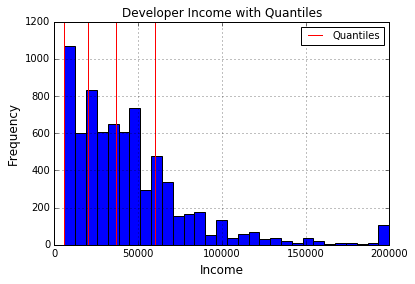

In [45]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins = 30,color = 'blue')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color = 'r')
ax.legend([qvl], ['Quantiles'], fontsize = 10)


ax.set_title('Developer Income with Quantiles', fontsize = 12)
ax.set_xlabel('Income', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)

In [46]:
# Adicionar las columnas correspondientes a los bines definidos con n-quantiles

quantile_labels = ['0-25Q','25-50Q','50-75Q','75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], q = quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], q = quantile_list, labels = quantile_labels)

fcc_survey_df.iloc[4:9]

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe,Age_bin_round,Age_bins_custom_range,Age_bins_custom_label,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN,2.0,"(15, 30]",2,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,NaN,United States of America,finance,Self-employed freelancer,NaN,male,40000.0,start your own business,NaN,English,NaN,bachelor's degree,NaN,3.0,"(30, 45]",3,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,NaN,Singapore,software development,Employed for wages,NaN,male,32000.0,NaN,NaN,Mandarin Chinese,NaN,bachelor's degree,NaN,2.0,"(15, 30]",2,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,NaN,India,office and administrative support,Employed for wages,NaN,male,40000.0,freelance,NaN,Telugu,married or domestic partnership,master's degree (non-professional),NaN,3.0,"(30, 45]",3,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,NaN,United States of America,software development,Employed for wages,NaN,male,80000.0,NaN,NaN,English,NaN,bachelor's degree,NaN,3.0,"(30, 45]",3,"(60000.0, 200000.0]",75-100Q


## STATISTICAL TRANSFORMATIONS.

En esta sección analizaremos las transformaciones estadísticas de la data, entre ellas la Log transformation y la Box-Cox transformations, ambas pretenecientes a la familia de funciones de transformaciones con potencia para crear transformaciones monotónicas. Estas últimas son trasnformaciones de data para que tengan un comportamiento creciente o decreciente.

Las transformaciones monotócicas son muy útiles para estabilizar la varianza, hacer la data mas similar a la distribución normal y mejora las relaciones de asociación como la correlación de pearson.

### Log transformation

Las transformaciones logarítmicas son muy usadas para normalizar distribuciones segadas.

Como ejemplo de esto utilizaremos el data set de los desarrolladores de software

In [50]:
fcc_survey_df['Income_log'] = np.log((1 + fcc_survey_df['Income']))
fcc_survey_df[['ID.x','Age','Income','Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5,450,'$\\mu$=10.43')

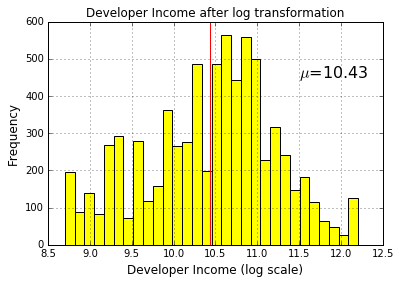

In [53]:

income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']),2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins = 30,color = 'yellow')
plt.axvline(income_log_mean, color = 'r')
ax.set_title('Developer Income after log transformation', fontsize = 12)
ax.set_xlabel('Developer Income (log scale)', fontsize = 12)
ax.set_ylabel('Frequency', fontsize = 12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=16)

Como se puede observar el histograma original presenta un sesgo hacia la derecha muy marcado, este histograma ya tiene una forma mas a una distribución normal.

## Box-Cox transformation

También utilizada esta técnica para corregir sesgos en las distribuciones de la data, para corregir varianzas y para corregir la no linealidad.}


Su parámetro principal es lambda.